# Graph Analysis
### Kruskal's algorithm for minimum spanning tree (MST)
We talked about **minimum spanning tree** (**MST**) earlier in the previous post. Here, we use another algorithm called **Kruskal's algorithm** to obtain an **MST**. 
**Reminder:** A minimum spanning tree is a subset of edges in a connected, weighted, undirected graph that connects all nodes without any cycles and has the minimum possible total edge weight. 

**Kruskal's algorithm** finds a **Minimum Spanning Tree (MST)** by 
- first sorting all edges by weight,
- and then adding the smallest edge that doesn’t form a cycle. And continue until we have enough edges.


<hr>

Some key points about Prim's algorithm for a graph $G=(V,E)$:
- **Time Complexity:** O(|E| log |E|) using **union-find**.
- **Space complexity:** O(|V|) without considering the edges for the graph. It is $O(|V|+|E|)$ by considering edges of the graph.
- **Optimality:** kruskal's algorithm guarantees an optimal MST for connected, weighted, undirected graphs.

**Reminder:** **Disjoint-set** also called **union-find** has already been introduced in a post in the repository of **Computer-Science**.
<hr>

In the following, we implement Kruskal's algorithm with a **union-find** implemented here. Next, we use Kruskal's algorithm for two simple graphs to get their MST. Finally, we display the graphs and their MST using module **NetworkX**.

https://github.com/ostad-ai/Graph-Analysis
<br>Explanation in English :https://www.pinterest.com/HamedShahHosseini/graph-analysis/

In [1]:
# Import required modules to display graphs
import networkx as nx
from matplotlib import pyplot as plt

In [2]:
# Define UnionFind class
class UnionFind:
    def __init__(self, nodes):
        self.parent = {node: node for node in nodes}
        self.rank = {node: 0 for node in nodes}
    
    def find(self, x):
        
        if self.parent[x] != x:
            self.parent[x] = self.find(self.parent[x])  # Path compression
        return self.parent[x]
    
    def union(self, x, y):
        rx, ry = self.find(x), self.find(y)
        if rx == ry:
            return False
        if self.rank[rx] < self.rank[ry]:
            self.parent[rx] = ry
        elif self.rank[rx] > self.rank[ry]:
            self.parent[ry] = rx
        else:
            self.parent[ry] = rx
            self.rank[rx] += 1
        return True

In [3]:
def kruskal_mst(edges):
    """
    Compute Minimum Spanning Tree (or Forest) using Kruskal's algorithm.
    
    Args:
        edges: List of tuples (node1, node2, weight)
               Example: [('A', 'B', 4), ('B', 'C', 2), ...]
    
    Returns:
        mst: List of edges in MST: [(u, v, weight), ...]
        total_weight: Sum of weights in MST
    """
    if not edges:
        return [], 0

    # Extract all unique nodes
    nodes = set()
    for u, v, _ in edges:
        nodes.add(u)
        nodes.add(v)
    
    # Sort edges by weight (3rd element)
    sorted_edges = sorted(edges, key=lambda x: x[2])
    
    uf = UnionFind(nodes)
    mst = []
    total_weight = 0

    for u, v, weight in sorted_edges:
        if uf.union(u, v):
            mst.append((u, v, weight))
            total_weight += weight
            if len(mst) == len(nodes) - 1:
                break

    return mst, total_weight

In [4]:
# ------------------------------
# 🧪 Example Usage
# ------------------------------
# Edges in (node1, node2, weight) format
graph_edges = [
    ('A', 'B', 4),
    ('A', 'C', 1),
    ('B', 'C', 2),
    ('B', 'D', 5),
    ('C', 'D', 1),
    ('C', 'E', 3),
    ('D', 'E', 6)
]

mst, cost = kruskal_mst(graph_edges)

print("✅ Minimum Spanning Tree:")
for u, v, w in mst:
    print(f"  {u} ──{w}── {v}")
print(f"\nTotal Weight: {cost}")

✅ Minimum Spanning Tree:
  A ──1── C
  C ──1── D
  B ──2── C
  C ──3── E

Total Weight: 7


In [5]:
# Another example: Kruskal's with city names as nodes
# Network of cities with distances
edges = [
    ("New York", "Boston", 200),
    ("New York", "Philadelphia", 100),
    ("Boston", "Philadelphia", 300),
    ("New York", "Washington DC", 225),
    ("Philadelphia", "Washington DC", 150),
    ("Boston", "Chicago", 1000),
    ("Washington DC", "Chicago", 700)
]

print("String Nodes - City Network:")
print("=" * 40)
mst_edges, total_weight = kruskal_mst(edges)

print("Minimum Spanning Tree:")
for u, v, weight in mst_edges:
    print(f"  {u} -- {v} ({weight} miles)")
print(f"Total distance: {total_weight} miles")

String Nodes - City Network:
Minimum Spanning Tree:
  New York -- Philadelphia (100 miles)
  Philadelphia -- Washington DC (150 miles)
  New York -- Boston (200 miles)
  Washington DC -- Chicago (700 miles)
Total distance: 1150 miles


<hr style="height:3px;background-color:lightblue">

# Display the graphs and their MST
#### Here, we display the graphs used earlier and their obtained MST by NetworkX

In [6]:
# Extra, a function to convert your edges to Networkx style,
def convert_edges_to_networkx(edges, directed=False):
    """
    Convert your custom graph to NetworkX format.
    your_graph: list of edges in format (node1, node2, weight)
    """
    if directed:
        nx_graph = nx.DiGraph()
    else:
        nx_graph = nx.Graph()
    
    for edge in edges:
        if len(edge)==3:
            nx_graph.add_edge(edge[0],edge[1],weight=edge[2])
        else:
            nx_graph.add_edge(edge[0],edge[1])
    
    return nx_graph

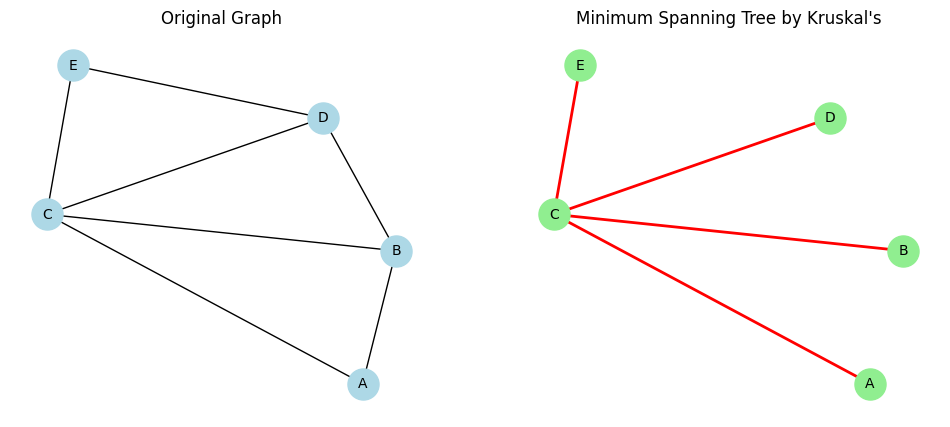

In [7]:
# Convert original graph to NetworkX using YOUR function
original_nx = convert_edges_to_networkx(graph_edges)
# Create MST graph
mst_nx = convert_edges_to_networkx(mst)
# Visualize
pos = nx.spring_layout(original_nx)

plt.figure(figsize=(12, 5))

# Left: Original graph
plt.subplot(1, 2, 1)
nx.draw(original_nx, pos, with_labels=True, node_color='lightblue', 
        node_size=500, font_size=10)
plt.title("Original Graph")

# Right: MST
plt.subplot(1, 2, 2)
nx.draw(mst_nx, pos, with_labels=True, node_color='lightgreen', 
        node_size=500, font_size=10, edge_color='red', width=2)
plt.title("Minimum Spanning Tree by Kruskal's")
plt.show()

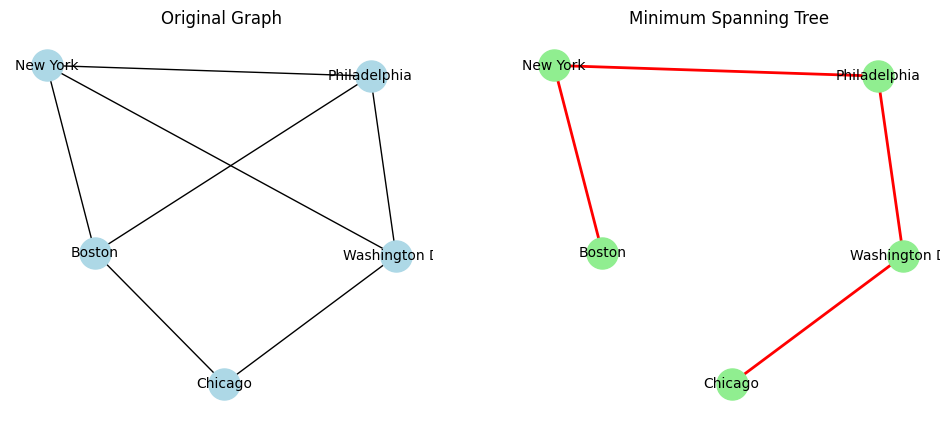

In [8]:
# Convert original graph to NetworkX using YOUR function
original_nx = convert_edges_to_networkx(edges)
# Create MST graph
mst_nx = convert_edges_to_networkx(mst_edges)
# Visualize
pos = nx.spring_layout(original_nx)

plt.figure(figsize=(12, 5))

# Left: Original graph
plt.subplot(1, 2, 1)
nx.draw(original_nx, pos, with_labels=True, node_color='lightblue', 
        node_size=500, font_size=10)
plt.title("Original Graph")

# Right: MST
plt.subplot(1, 2, 2)
nx.draw(mst_nx, pos, with_labels=True, node_color='lightgreen', 
        node_size=500, font_size=10, edge_color='red', width=2)
plt.title("Minimum Spanning Tree")
plt.show()